<a href="https://colab.research.google.com/github/JisbethDiaz/FCFM_Miner-a_de_Datos/blob/Miner%C3%ADa-de-datos/Proyecto_FINCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Valuación de acciones
La valoración de las acciones es un sistema para determinar el valor de un negocio mediante la estimación del valor de sus acciones. 



In [ ]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import datetime

In [ ]:
!pip install yfinance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import yfinance as yf

In [ ]:
val = ['KOF', 'ARCA', 'OMA','BIMBO','ALSEA']
pf_dat = pd.read_csv('/content/drive/MyDrive/Archivos Collab/ACCIONES.csv', index_col='Date')

# '%Y-%m-%d'
start= '2020-05-12'
end= '2022-05-12'

In [ ]:
koful= yf.download('KOFUBL.MX', start, end)
arca= yf.download('AC.MX', start, end)
oma= yf.download('OMAB.MX', start, end)
gruma= yf.download('GRUMAB.MX', start, end)
walmex= yf.download('WALMEX.MX', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##Análisis exploratorio
Comenzamos comparando los precios absolutos de las acciones en el mercado de las empresas seleccionadas en últimos 2 años. 

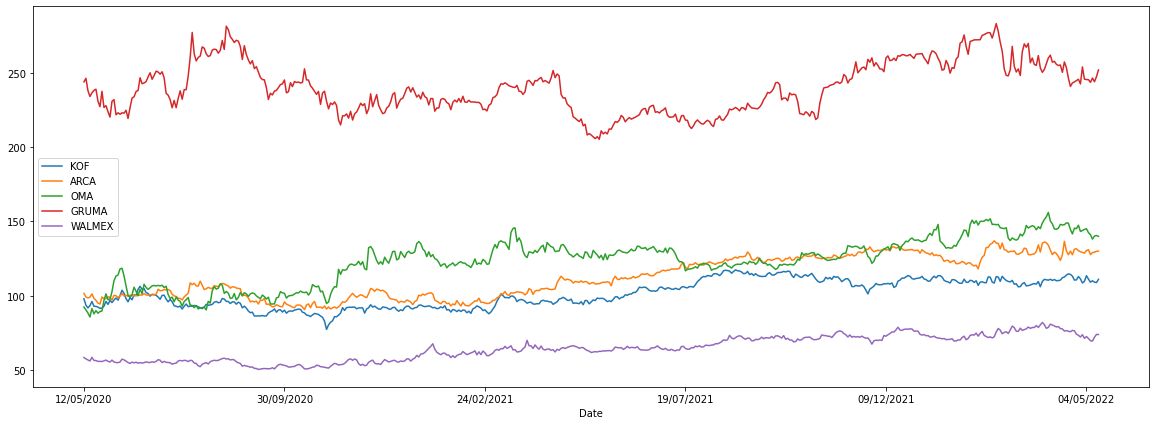

In [ ]:
pf_dat.plot(figsize=(20,7))

Es fácil notar que GRUMA.MX tiene el valor por accion más alto de las 5 que seleccionamos. Despúes le prosigue OMA, Arca, KOF y por último Walmart.


Comparando el volumen de las acciones en circulación identificamos que:

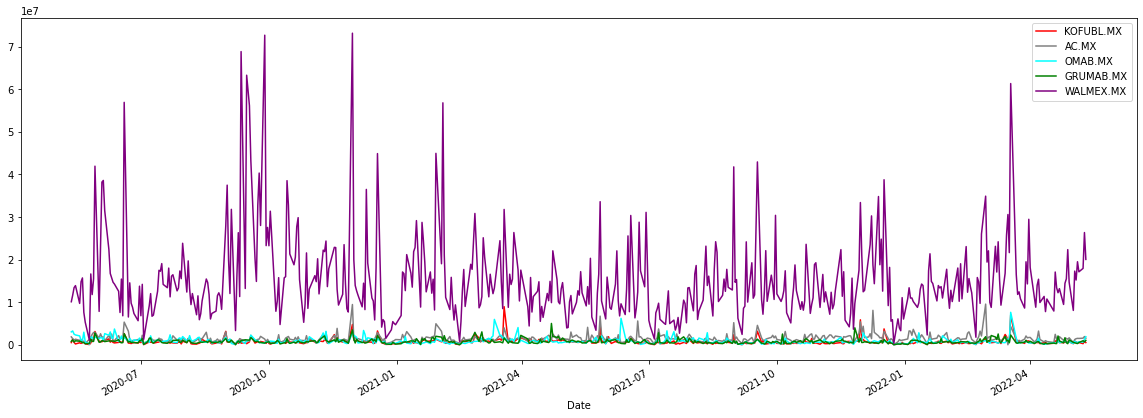

In [ ]:
koful['Volume'].plot(label='KOFUBL.MX', figsize=(20,7), color='red')
arca['Volume'].plot(label='AC.MX', figsize=(20,7), color='gray')
oma['Volume'].plot(label='OMAB.MX' , figsize=(20,7), color='cyan')
gruma['Volume'].plot(label='GRUMAB.MX', figsize=(20,7), color='green')
walmex['Volume'].plot(label='WALMEX.MX', figsize=(20,7), color='purple')
plt.legend()

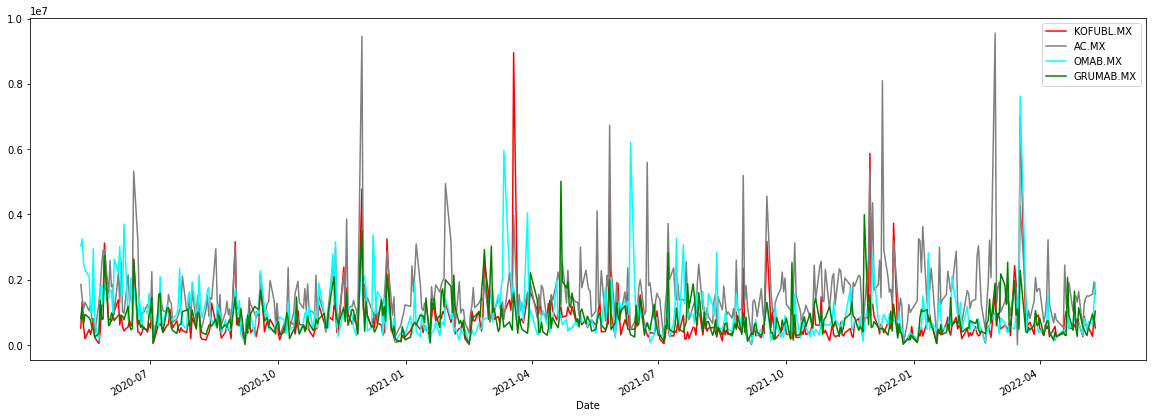

In [ ]:
koful['Volume'].plot(label='KOFUBL.MX', figsize=(20,7), color='red')
arca['Volume'].plot(label='AC.MX', figsize=(20,7), color='gray')
oma['Volume'].plot(label='OMAB.MX' , figsize=(20,7), color='cyan')
gruma['Volume'].plot(label='GRUMAB.MX', figsize=(20,7), color='green')
plt.legend()

WALMEX.MX es la empresa con más acciones en circulación. Después la que se destaca un poco de las demás es AC.MX. LAs demás suelen tener cantidades de accines en circulación similares.
Sin embargo, este dato por si solo no nos dice nada, más bien, sirve como complemento para el siguiente punto.

##Captalización de mercado
Representado por: Volumen * Precio de la acción
Esto nos ayuda a comparar mejor a las empresas.


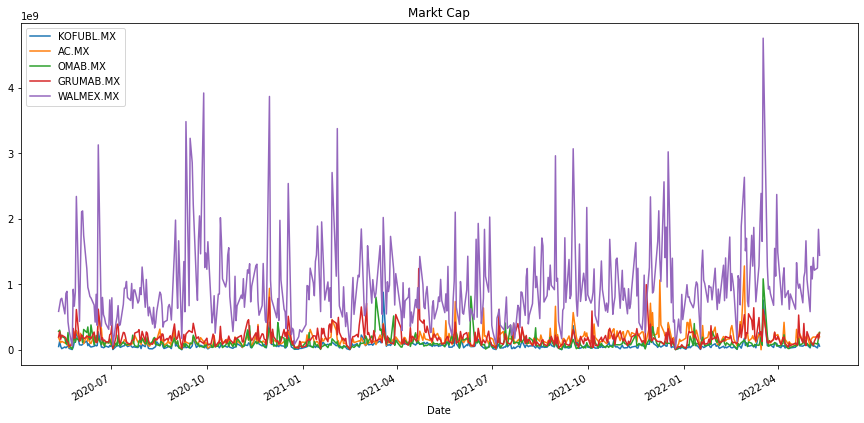

In [ ]:
koful['MarktCap'] = koful['Open'] * koful['Volume'] 
arca['MarktCap'] = arca['Open'] * arca['Volume'] 
oma['MarktCap'] = oma['Open'] * oma['Volume'] 
gruma['MarktCap'] = gruma['Open'] * gruma['Volume'] 
walmex['MarktCap'] = walmex['Open'] * walmex['Volume']

koful['MarktCap'].plot(label='KOFUBL.MX', figsize=(15,7))
arca['MarktCap'].plot(label='AC.MX')
oma['MarktCap'].plot(label='OMAB.MX')
gruma['MarktCap'].plot(label='GRUMAB.MX')
walmex['MarktCap'].plot(label='WALMEX.MX')

plt.title('Markt Cap')
plt.legend()

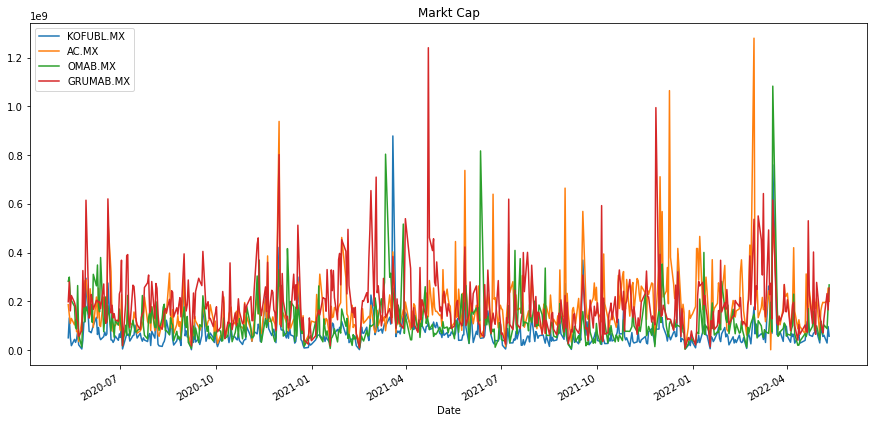

In [ ]:
koful['MarktCap'].plot(label='KOFUBL.MX', figsize=(15,7))
arca['MarktCap'].plot(label='AC.MX')
oma['MarktCap'].plot(label='OMAB.MX')
gruma['MarktCap'].plot(label='GRUMAB.MX')


plt.title('Markt Cap')
plt.legend()

Podemos destacar que aunque el valor de las acciones de Walmart es menor, tiene más acciones en el mercado, por lo que se distingue una empresa de gran tamaño. Aunado a esto se cree que las inversiones a empresas de gran capitalización proporcionan recompensas a largo plazo y suponen menos riesgo, ya que se encuentran más establecidas. 

Esto es un buen indicador para Walmart, pues nos supone que nuestras inversiones serán favorables si decidimos invertir en ella.

Por otra parte, las acciones de GRUMA tiene un valor alto en el mercado, y a pesar de tener menos acciones en circulación que Walmart, se puede apreciar que la capitalización en el mercado es mayor que las 3 restantes.

##Medias móviles
Los precios suelen ser volátiles y cambiar rápidamente con el tiempo. Para observar cualquier tendencia o patron podemos tomar una media móvil con un promedio de 200 y 50 días.

Media movil de KOFUL

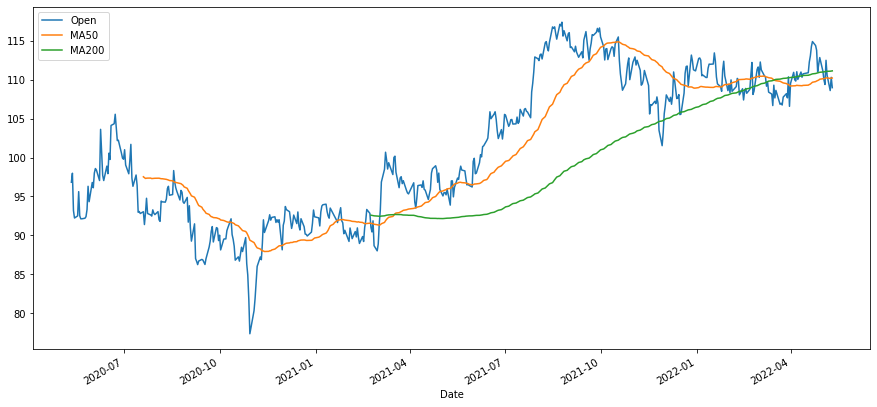

In [ ]:
koful['MA50']=koful['Open'].rolling(50).mean()
koful['MA200']=koful['Open'].rolling(200).mean()
koful['Open'].plot(figsize=(15,7))
koful['MA50'].plot()
koful['MA200'].plot()
plt.legend()

Podemos ver que la media móvil de  200 cortó hacia arriba a la media móvil de 50, por lo que se espera una baja en el valor de las acciones (Señal de venta).

Media móvil de ARCA 

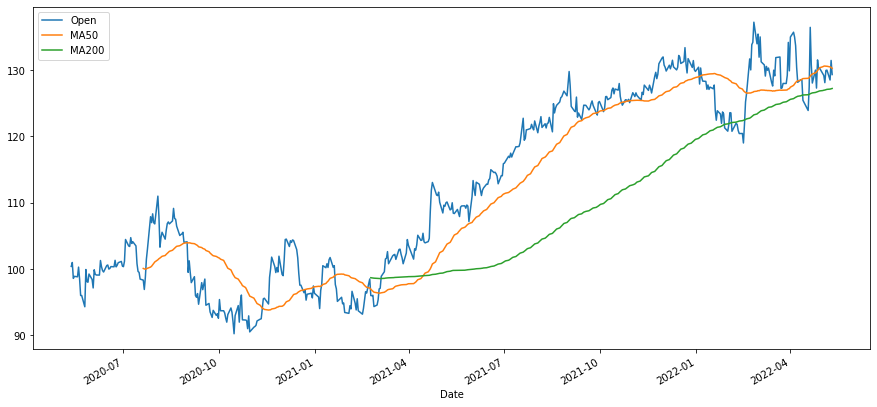

In [ ]:
arca['MA50']=arca['Open'].rolling(50).mean()
arca['MA200']=arca['Open'].rolling(200).mean()
arca['Open'].plot(figsize=(15,7))
arca['MA50'].plot()
arca['MA200'].plot()
plt.legend()

Para ARCA notamos que  la media móvil de  200 no se ha intersectado con la media móvil de 50, por lo que esperamos una alza en los precios de la acción, al menos por unos meses.

Media movil de OMA

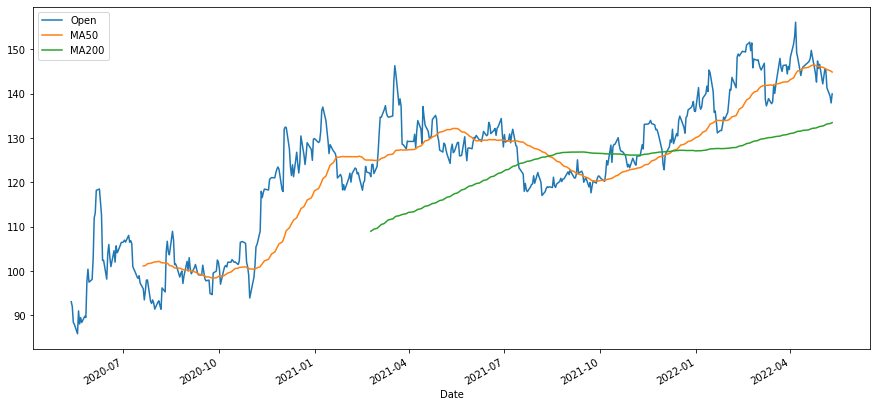

In [ ]:
oma['MA50']=oma['Open'].rolling(50).mean()
oma['MA200']=oma['Open'].rolling(200).mean()
oma['Open'].plot(figsize=(15,7))
oma['MA50'].plot()
oma['MA200'].plot()
plt.legend()

Para OMA, observamos que no se han interesctado las medias móviles. Sin embargo, podemos ver que ha cortado la amplitud delcanala con tendencia a la alza, además de que la media móvil de 50 ha cortado, por lo que de igual manera se espera una baja en los precios al menos por unos meses.

Media movil de GRUMA

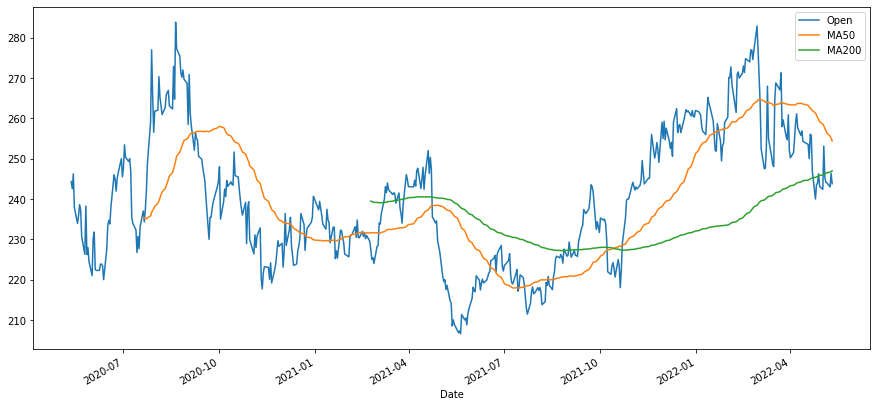

In [ ]:
gruma['MA50']=gruma['Open'].rolling(50).mean()
gruma['MA200']=gruma['Open'].rolling(200).mean()
gruma['Open'].plot(figsize=(15,7))
gruma['MA50'].plot()
gruma['MA200'].plot()
plt.legend()

Para la empresa GRUMA  notamos que tiene una tendencia bajista y se ve que la media móvil de 200 está por cortar a la de 50 hacia arriba. Lo anterior se percibe como señal de venta.

Media móvil de Walmex

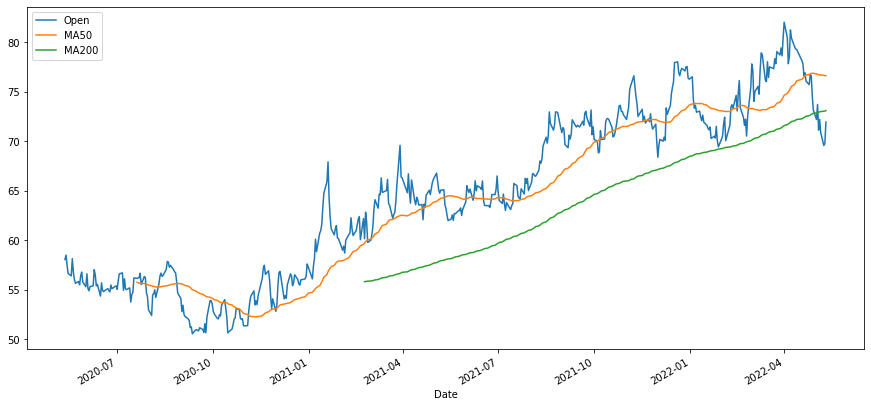

In [ ]:
walmex['MA50']=walmex['Open'].rolling(50).mean()
walmex['MA200']=walmex['Open'].rolling(200).mean()
walmex['Open'].plot(figsize=(15,7))
walmex['MA50'].plot()
walmex['MA200'].plot()
plt.legend()

Notamos que la acción está por debajo de ambas medias, lo que indica que es un buen momento para vender.

##Aumento porcentual del valor de las acciones
Este es el cambio en las existencias en comparación con el día anterior. Cuanto mayor sea el valor, ya sea positivo o negativo, más volátil será la acción.

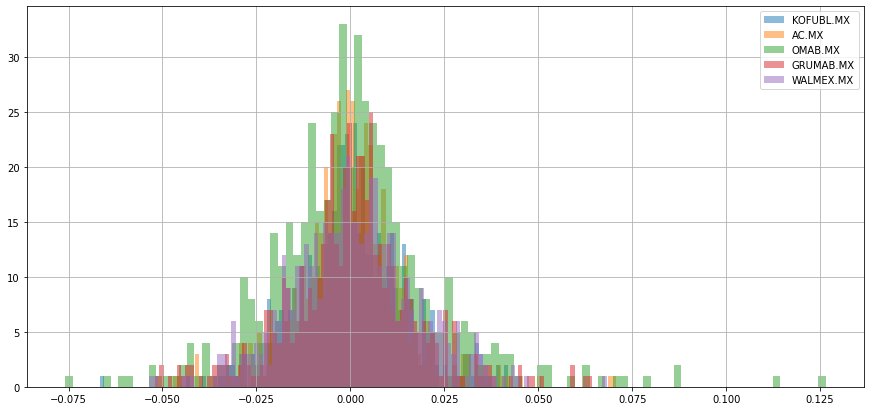

In [ ]:
#Volatility
koful['returns']= (koful['Close'] / koful['Close'].shift(1)) - 1
arca['returns']= (arca['Close'] / arca['Close'].shift(1)) - 1
oma['returns']= (oma['Close'] / oma['Close'].shift(1)) - 1
gruma['returns']= (gruma['Close'] / gruma['Close'].shift(1)) - 1
walmex['returns']= (walmex['Close'] / walmex['Close'].shift(1)) - 1

koful['returns'].hist( bins=100, label='KOFUBL.MX', alpha=0.5, figsize=(15,7) )
arca['returns'].hist( bins=100, label='AC.MX', alpha=0.5)
oma['returns'].hist( bins=100, label='OMAB.MX', alpha=0.5)
gruma['returns'].hist( bins=100, label='GRUMAB.MX', alpha=0.5)
walmex['returns'].hist( bins=100, label='WALMEX.MX', alpha=0.5)

plt.legend()

El gráfico muestra el porcentaje de aumento en el histograma del precio de las acciones.
Concluimos que la empresa con la acción más volátil es OMA.
